---
## <div align="center">Exploratory Data Analysis & Visualization</div>

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl
from sklearn import metrics
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### Read & Load the Dataset

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


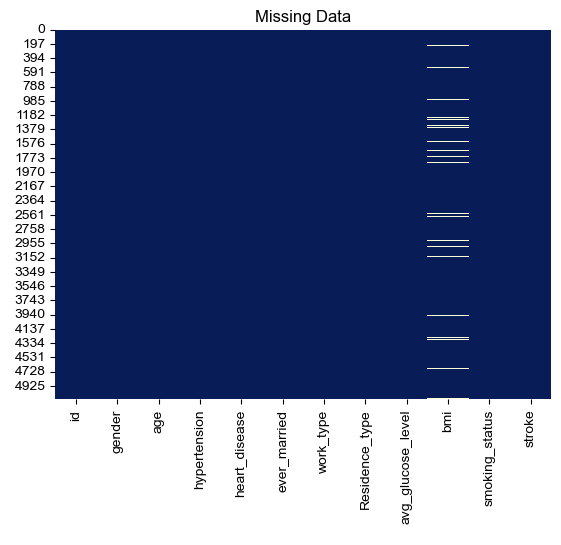

In [4]:
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu_r")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('Missing Data')
plt.show()

---
## <div align="center">VISUALIZATION</div>

### DATA BINNING

In [5]:
#AGE RANGE
import numpy as np
data['AGE_RANGE'] = np.where (
    data['age'] <= 10, 'Gen Alpha', 
    np.where(data['age'] <= 26,'Gen Z', 
             np.where(data['age'] <= 42, 'Millennials',
                      np.where(data['age'] <=58, 'Gen X',
                              np.where(data['age'] <= 77, 'Baby Boomers', 'The Silent Generation')))))
data #Show the Table

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE_RANGE
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Baby Boomers
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Baby Boomers
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,The Silent Generation
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Gen X
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,The Silent Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,The Silent Generation
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,The Silent Generation
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Millennials
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Gen X


In [6]:
#BMI RANGE
import numpy as np
data['BMI_RANGE']= np.where(
    data['bmi'] <18.5, 'Underweight',
    np.where(data['bmi'] <25, 'normal',
            np.where(data['bmi'] <30, 'overweight', 'obesity')))
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE_RANGE,BMI_RANGE
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Baby Boomers,obesity
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Baby Boomers,obesity
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,The Silent Generation,obesity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Gen X,obesity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,The Silent Generation,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,The Silent Generation,obesity
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,The Silent Generation,obesity
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Millennials,obesity
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Gen X,overweight


In [7]:
# GLUCOSE AVERANGE LEVEL
import numpy as np
data['AVG_GLUCOSE'] = np.where (
    data['avg_glucose_level'] < 55, 'Very Low', 
    np.where(data['avg_glucose_level'] < 70,'Low', 
             np.where(data['avg_glucose_level'] < 181, 'In Target Range',
                      np.where(data['avg_glucose_level'] < 250, 'High','Very High'))))
data #Show the Table

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE_RANGE,BMI_RANGE,AVG_GLUCOSE
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Baby Boomers,obesity,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Baby Boomers,obesity,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,The Silent Generation,obesity,In Target Range
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Gen X,obesity,In Target Range
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,The Silent Generation,normal,In Target Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,The Silent Generation,obesity,In Target Range
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,The Silent Generation,obesity,In Target Range
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Millennials,obesity,In Target Range
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Gen X,overweight,In Target Range


In [8]:
#HYPERTENSION
data['HYPER'] = np.where(
    data['hypertension'] ==  0, 'Doesnt Hypertension', 'Hypertension')
data #Show the Table

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE_RANGE,BMI_RANGE,AVG_GLUCOSE,HYPER
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Baby Boomers,obesity,High,Doesnt Hypertension
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Baby Boomers,obesity,High,Doesnt Hypertension
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,The Silent Generation,obesity,In Target Range,Doesnt Hypertension
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Gen X,obesity,In Target Range,Doesnt Hypertension
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,The Silent Generation,normal,In Target Range,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,The Silent Generation,obesity,In Target Range,Hypertension
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,The Silent Generation,obesity,In Target Range,Doesnt Hypertension
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Millennials,obesity,In Target Range,Doesnt Hypertension
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Gen X,overweight,In Target Range,Doesnt Hypertension


In [9]:
#HEART DISEASE
data['HEART'] = np.where(
    data['heart_disease'] ==  0, 'Doesnt Heart Disease', 'Heart Disease')
data #Show the Table

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE_RANGE,BMI_RANGE,AVG_GLUCOSE,HYPER,HEART
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Baby Boomers,obesity,High,Doesnt Hypertension,Heart Disease
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Baby Boomers,obesity,High,Doesnt Hypertension,Doesnt Heart Disease
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,The Silent Generation,obesity,In Target Range,Doesnt Hypertension,Heart Disease
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Gen X,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,The Silent Generation,normal,In Target Range,Hypertension,Doesnt Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,The Silent Generation,obesity,In Target Range,Hypertension,Doesnt Heart Disease
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,The Silent Generation,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Millennials,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Gen X,overweight,In Target Range,Doesnt Hypertension,Doesnt Heart Disease


In [10]:
#STROKE
data['STROKE'] = np.where(
    data['stroke'] ==  0, 'Not Stroke', 'Stroke')
data #Show the Table

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE_RANGE,BMI_RANGE,AVG_GLUCOSE,HYPER,HEART,STROKE
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Baby Boomers,obesity,High,Doesnt Hypertension,Heart Disease,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Baby Boomers,obesity,High,Doesnt Hypertension,Doesnt Heart Disease,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,The Silent Generation,obesity,In Target Range,Doesnt Hypertension,Heart Disease,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Gen X,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,The Silent Generation,normal,In Target Range,Hypertension,Doesnt Heart Disease,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,The Silent Generation,obesity,In Target Range,Hypertension,Doesnt Heart Disease,Not Stroke
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,The Silent Generation,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Not Stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Millennials,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Not Stroke
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Gen X,overweight,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Not Stroke


In [11]:
data.rename(columns={'AGE_glucose': 'AVG_GLUCOSE'}, inplace=True)

In [12]:
data.rename(columns={'gender': 'GENDER'}, inplace=True)

In [13]:
my_data_crea = data[['GENDER', 'AGE_RANGE', 'BMI_RANGE', 'AVG_GLUCOSE','HYPER','HEART', 'ever_married' ,'work_type', 'Residence_type', 'smoking_status', 'STROKE']]
my_data_crea

,GENDER,AGE_RANGE,BMI_RANGE,AVG_GLUCOSE,HYPER,HEART,ever_married,work_type,Residence_type,smoking_status,STROKE
0,Male,Baby Boomers,obesity,High,Doesnt Hypertension,Heart Disease,Yes,Private,Urban,formerly smoked,Stroke
1,Female,Baby Boomers,obesity,High,Doesnt Hypertension,Doesnt Heart Disease,Yes,Self-employed,Rural,never smoked,Stroke
2,Male,The Silent Generation,obesity,In Target Range,Doesnt Hypertension,Heart Disease,Yes,Private,Rural,never smoked,Stroke
3,Female,Gen X,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Yes,Private,Urban,smokes,Stroke
4,Female,The Silent Generation,normal,In Target Range,Hypertension,Doesnt Heart Disease,Yes,Self-employed,Rural,never smoked,Stroke
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,The Silent Generation,obesity,In Target Range,Hypertension,Doesnt Heart Disease,Yes,Private,Urban,never smoked,Not Stroke
5106,Female,The Silent Generation,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Yes,Self-employed,Urban,never smoked,Not Stroke
5107,Female,Millennials,obesity,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Yes,Self-employed,Rural,never smoked,Not Stroke
5108,Male,Gen X,overweight,In Target Range,Doesnt Hypertension,Doesnt Heart Disease,Yes,Private,Rural,formerly smoked,Not Stroke


## PIE CHART

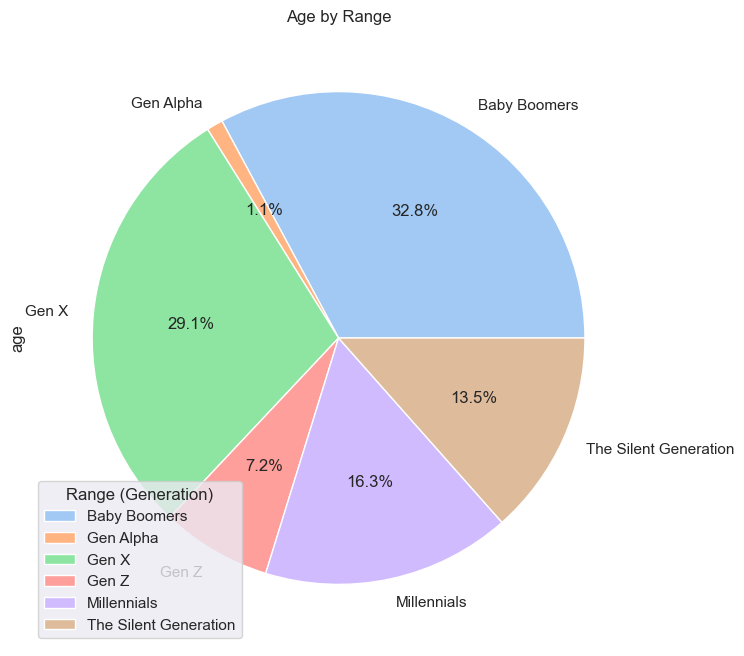

In [14]:
# Focus by using 'Age' Coloumn by group of AGE_RANGE
AGE_RANGE_PIE = data.groupby('AGE_RANGE')['age'].sum()

# Plotting Age by Range
AGE_RANGE_PIE.plot.pie(subplots=True, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Age by Range')
plt.legend(AGE_RANGE_PIE.index, loc="lower left", title='Range (Generation)')
plt.show()

# BARCHART

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Set the style of the visualization
sns.set(style="whitegrid")

In [17]:
visualization_data = my_data_crea.apply(lambda x: pd.Series(x.value_counts(normalize=True))).T

<Figure size 1200x800 with 0 Axes>

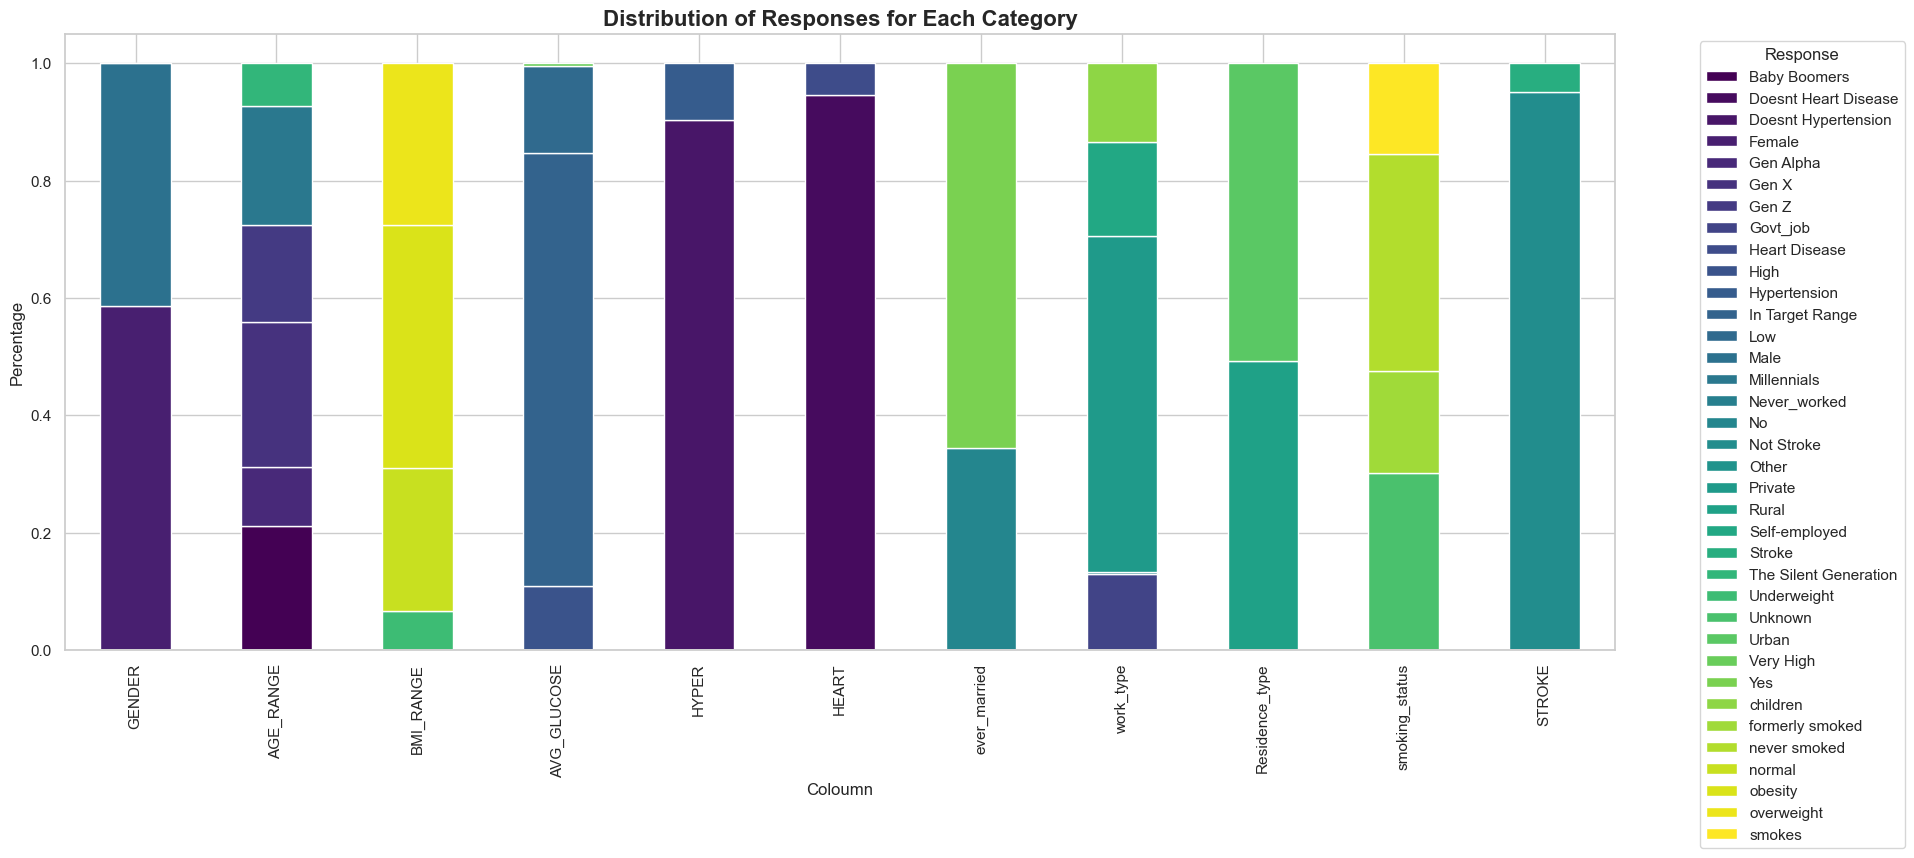

In [18]:
# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
ax = visualization_data.plot(kind="bar", stacked=True, colormap="viridis")

# Customize the plot
plt.title("Distribution of Responses for Each Category", fontweight='bold', fontsize=16)  # Make title bold and larger
plt.xlabel("Coloumn")
plt.ylabel("Percentage")
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# 3D

In [19]:
from mpl_toolkits.mplot3d import Axes3D

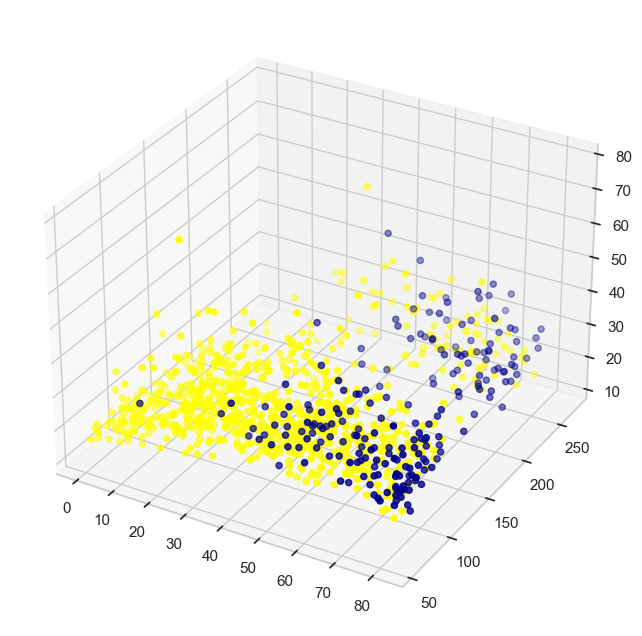

In [20]:
# Assuming df is your DataFrame
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for stroke = 1
ax.scatter(data[data["stroke"] == 1]['age'][:1000],
           data[data["stroke"] == 1]['avg_glucose_level'][:900],
           data[data["stroke"] == 1]['bmi'][:900],
           color='DarkBlue', label='Stroke')

# Scatter plot for stroke = 0
ax.scatter(data[data["stroke"] == 0]['age'][:900],
           data[data["stroke"] == 0]['avg_glucose_level'][:900],
           data[data["stroke"] == 0]['bmi'][:900],
           color='Yellow', label='Not Stroke')

---
## <div align="center">CLEANING RAW DATA</div>

#### Membuat DataFrame baru untuk variable-variable yang akan digunakan

In [21]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
df = data[['gender', 'age', 'hypertension', 'heart_disease',
           'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


#### Melihat banyaknya unique value pada tiap variable dalam dataset

In [23]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

#### Memvisualisasikan variable dengan dtype categorical dalam dataset

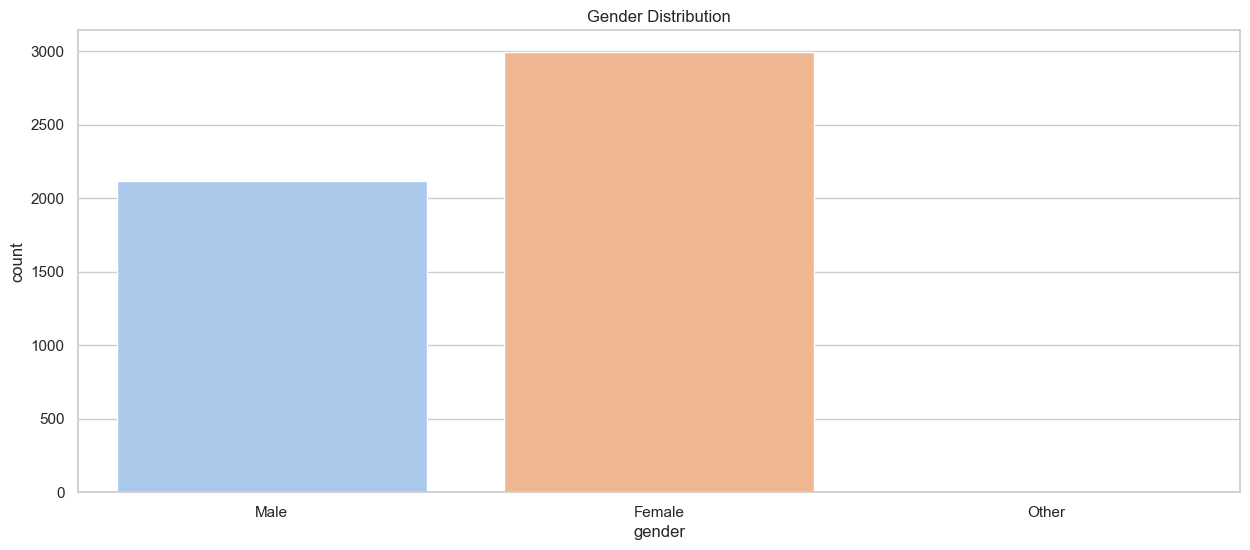

In [24]:
plt.figure(figsize=(15, 6))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x='gender', data=df, palette=colors)
plt.title('Gender Distribution')
plt.show()

In [25]:
# Menghapus data dengan gender Other karena tidak valid

df.drop(df[df['gender'] == 'Other'].index, inplace=True)

/var/folders/5x/z5x20npd72v6pqsp394rg9tc0000gp/T/ipykernel_93326/3885859513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['gender'] == 'Other'].index, inplace=True)


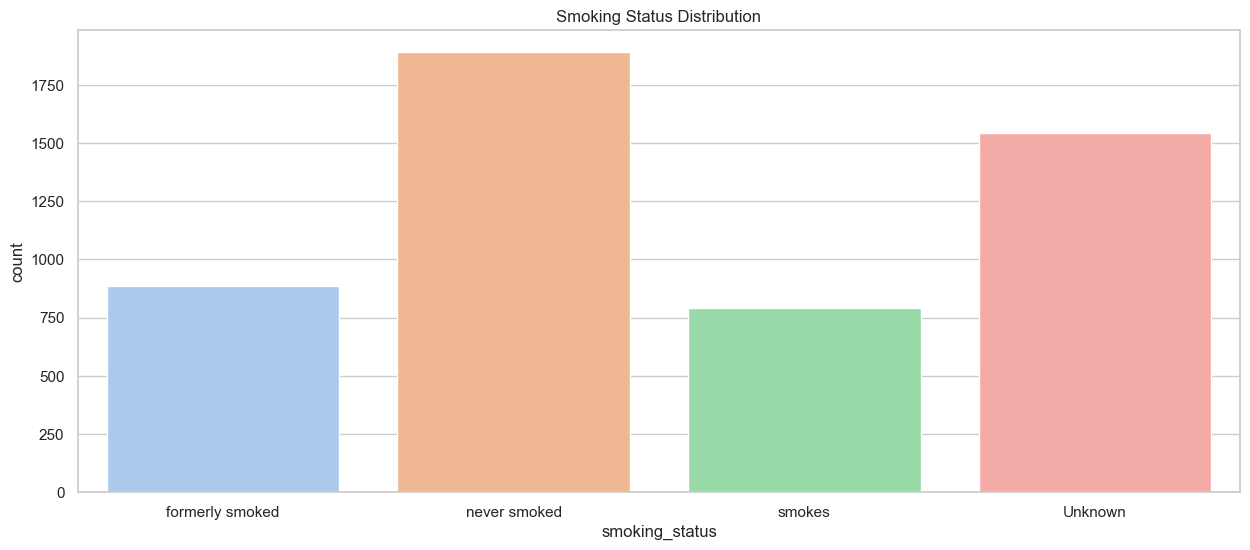

In [26]:
plt.figure(figsize=(15, 6))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x='smoking_status', data=df, palette=colors)
plt.title('Smoking Status Distribution')
plt.show()

In [27]:
# Menghapus data dengan smoking_status Unknown karena tidak valid

df.drop(df[df['smoking_status'] == 'Unknown'].index, inplace=True)

/var/folders/5x/z5x20npd72v6pqsp394rg9tc0000gp/T/ipykernel_93326/2175647561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['smoking_status'] == 'Unknown'].index, inplace=True)


#### Encoding beberapa variable categorical (gender & smoking_status) ke numeric

In [28]:
from sklearn.preprocessing import LabelEncoder

cdtype = df[['gender', 'smoking_status']]

le = LabelEncoder()
for var in cdtype:
    df[var] = le.fit_transform(df[var])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3565 entries, 0 to 5108
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3565 non-null   int64  
 1   age                3565 non-null   float64
 2   hypertension       3565 non-null   int64  
 3   heart_disease      3565 non-null   int64  
 4   avg_glucose_level  3565 non-null   float64
 5   bmi                3425 non-null   float64
 6   smoking_status     3565 non-null   int64  
 7   stroke             3565 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 250.7 KB


/var/folders/5x/z5x20npd72v6pqsp394rg9tc0000gp/T/ipykernel_93326/2385587201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])
/var/folders/5x/z5x20npd72v6pqsp394rg9tc0000gp/T/ipykernel_93326/2385587201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])


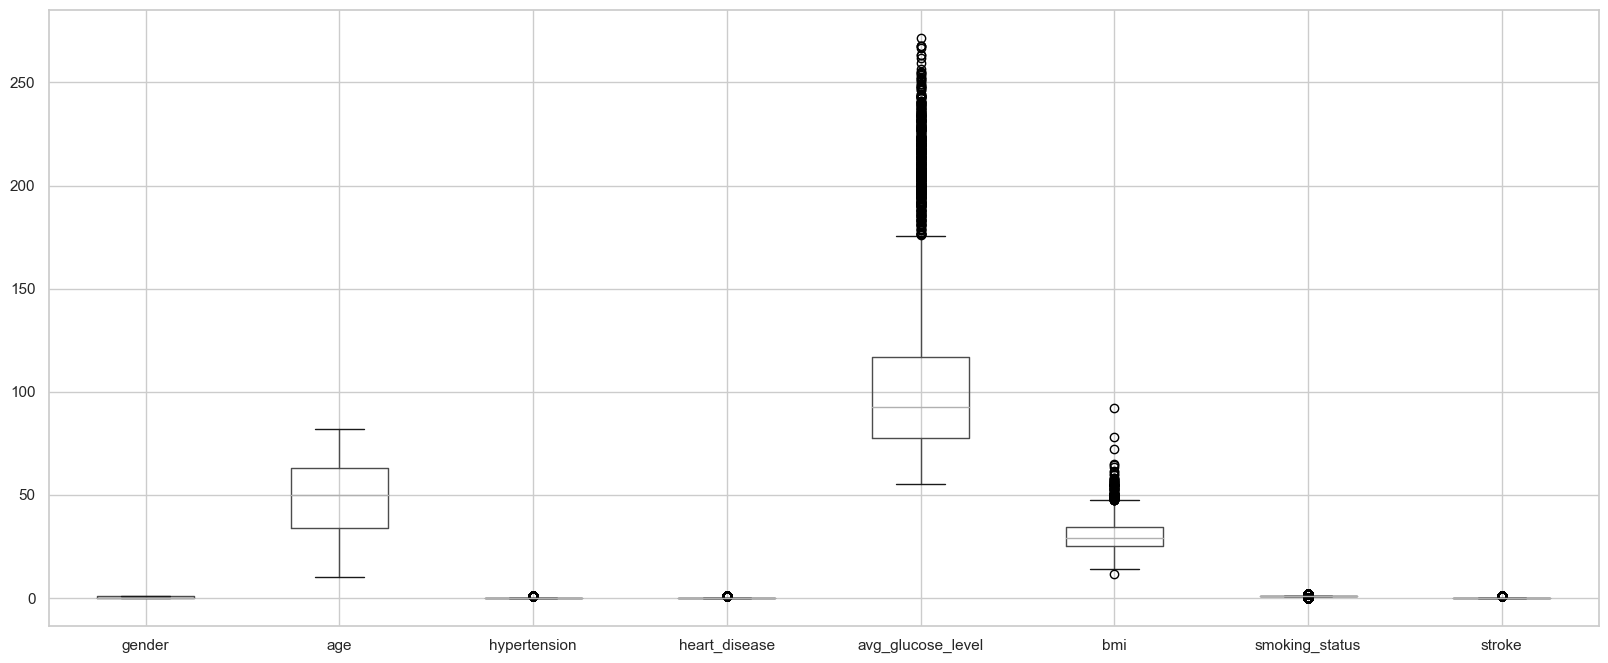

In [29]:
df.boxplot()
plt.show()

#### Cek NaN Values

In [30]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

#### Dropping the NaN Values

In [31]:
df = df.dropna()
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,0,1
2,1,80.0,0,1,105.92,32.5,1,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,1,1
5,1,81.0,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,71.97,28.3,1,0
5102,0,57.0,0,0,77.93,21.7,1,0
5106,0,81.0,0,0,125.20,40.0,1,0
5107,0,35.0,0,0,82.99,30.6,1,0


* Before drop NaN data : 5110 rows × 8 columns
* After drop NaN Data  : 3425 rows × 8 columns

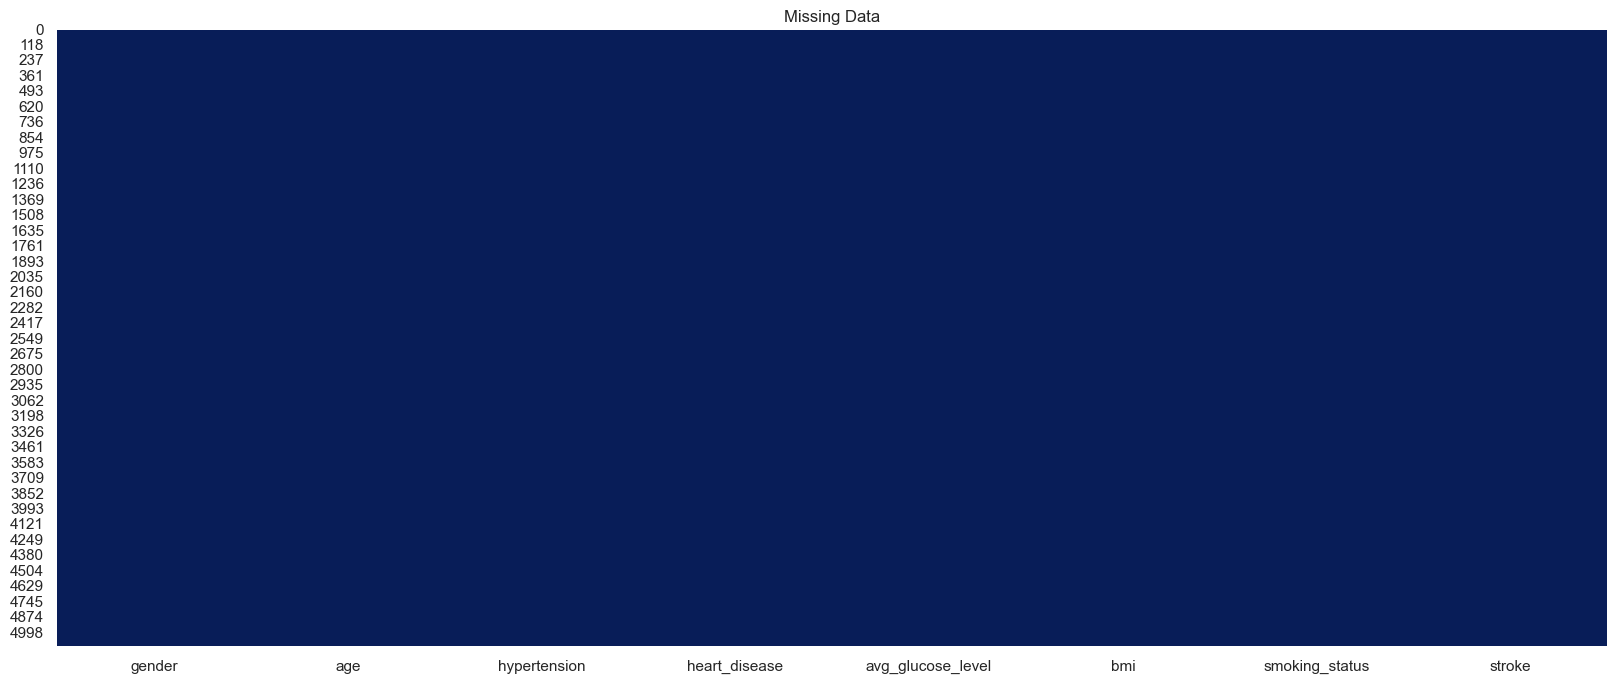

In [32]:
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('Missing Data')
plt.show()

#### Melihat korelasi antar variable dengan menvisualisasikan dengan heatmap

Text(0.5, 1.0, 'Data Correlation')

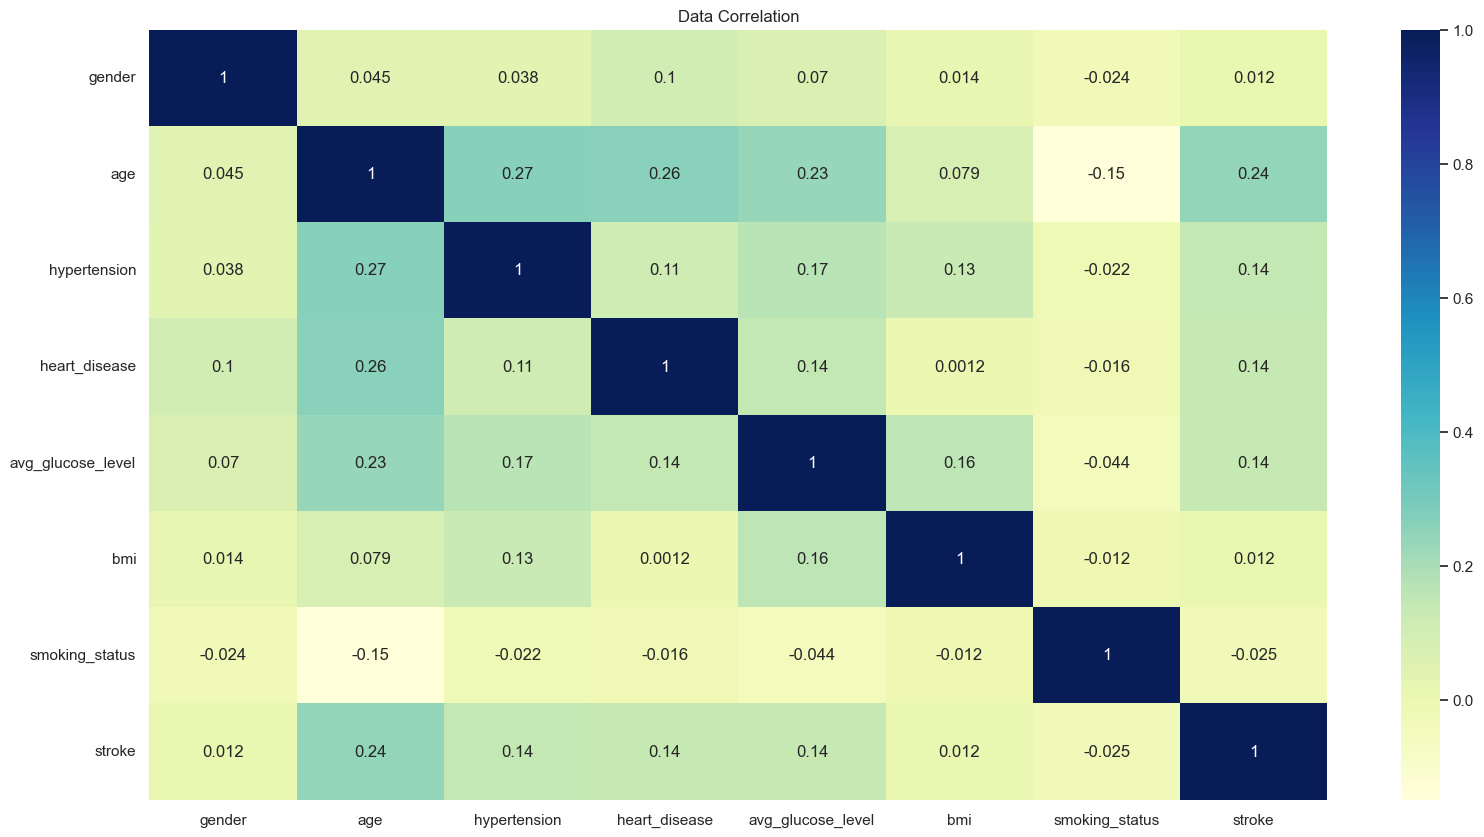

In [33]:
plt.figure(figsize = (19,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Data Correlation')

---
## <div align="center">Pre-processing</div>

#### Menentukan feature & target variable / class

In [34]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 
        'avg_glucose_level', 'bmi', 'smoking_status']].values
X[0:5]

array([[  1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.  ],
       [  1.  ,  80.  ,   0.  ,   1.  , 105.92,  32.5 ,   1.  ],
       [  0.  ,  49.  ,   0.  ,   0.  , 171.23,  34.4 ,   2.  ],
       [  0.  ,  79.  ,   1.  ,   0.  , 174.12,  24.  ,   1.  ],
       [  1.  ,  81.  ,   0.  ,   0.  , 186.21,  29.  ,   0.  ]])

In [35]:
y = df["stroke"]
y[0:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

#### Melihat banyaknya orang yang terkena (1) dan tidak terkena Stroke (0)

In [36]:
unique_vstroke = df["stroke"].value_counts()
unique_vstroke

stroke
0    3245
1     180
Name: count, dtype: int64

#### Gunakan SMOTE untuk meresampled data supaya label class menjadi lebih balance

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 5)
X_resampled, y_resampled = smote.fit_resample(X, y)

#### Membagi data train dan test

In [38]:
X_train, X_test,  y_train, y_test = train_test_split(X_resampled ,y_resampled , test_size = 0.2, random_state = 5)
print ('Train set:',X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (5192, 7) (5192,)
Test set: (1298, 7) (1298,)


---
## <div align="center">Modeling & Evaluation</div>

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score
import itertools

---
### <div align="center">Algorithm Decision Tree</div>

#### Modeling

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
strokeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
strokeTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
predTree = strokeTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3885    1
2217    0
1902    0
3210    0
2021    0
Name: stroke, dtype: int64


#### Evaluation & Visualization

In [43]:
print('\nClassification Report for Decision Tree Algorithm:')
print('\n', classification_report(y_test, predTree))


Classification Report for Decision Tree Algorithm:

               precision    recall  f1-score   support

           0       0.80      0.90      0.85       638
           1       0.89      0.79      0.83       660

    accuracy                           0.84      1298
   macro avg       0.85      0.84      0.84      1298
weighted avg       0.85      0.84      0.84      1298



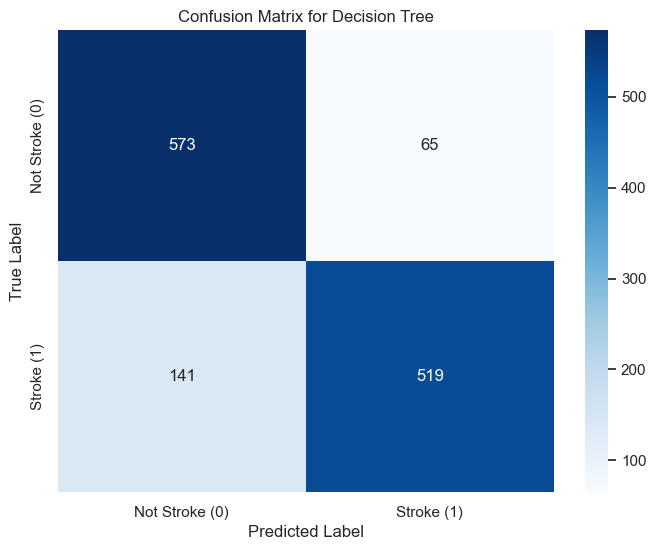

In [44]:
viz_cm = confusion_matrix(y_test, predTree)
labels = ['Not Stroke (0)', 'Stroke (1)']
          
plt.figure(figsize=(8, 6))
sns.heatmap(viz_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

DecisionTrees's Accuracy:  0.8412942989214176


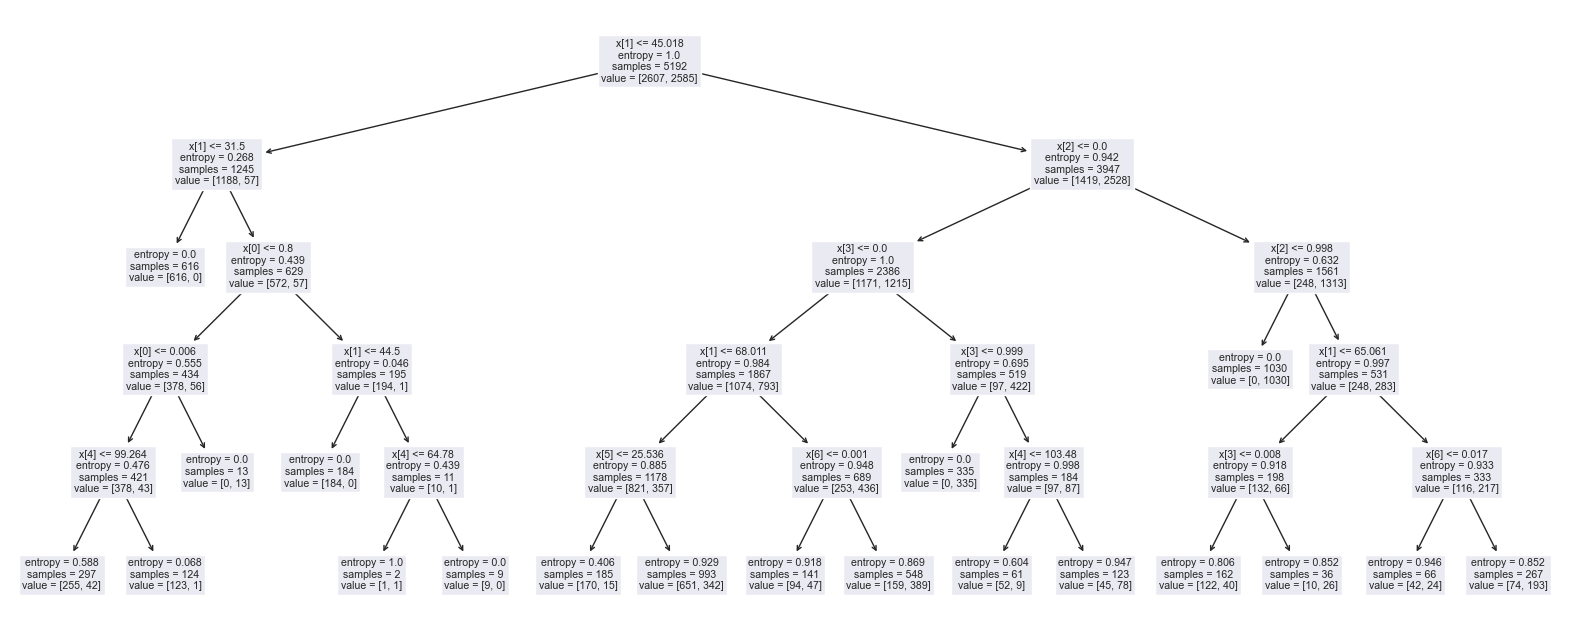

In [45]:
import sklearn.tree as tree

print ("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
tree.plot_tree(strokeTree)
plt.show()

In [46]:
from sklearn.tree import export_text
#Informasi tiap node dalam bentuk teks

tree_rules = export_text(strokeTree, feature_names=['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status'])
print(tree_rules)

|--- age <= 45.02
|   |--- age <= 31.50
|   |   |--- class: 0
|   |--- age >  31.50
|   |   |--- gender <= 0.80
|   |   |   |--- gender <= 0.01
|   |   |   |   |--- avg_glucose_level <= 99.26
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  99.26
|   |   |   |   |   |--- class: 0
|   |   |   |--- gender >  0.01
|   |   |   |   |--- class: 1
|   |   |--- gender >  0.80
|   |   |   |--- age <= 44.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  44.50
|   |   |   |   |--- avg_glucose_level <= 64.78
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  64.78
|   |   |   |   |   |--- class: 0
|--- age >  45.02
|   |--- hypertension <= 0.00
|   |   |--- heart_disease <= 0.00
|   |   |   |--- age <= 68.01
|   |   |   |   |--- bmi <= 25.54
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  25.54
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  68.01
|   |   |   |   |--- smoking_status <= 0.00
|   |   |   |   |   |--- 

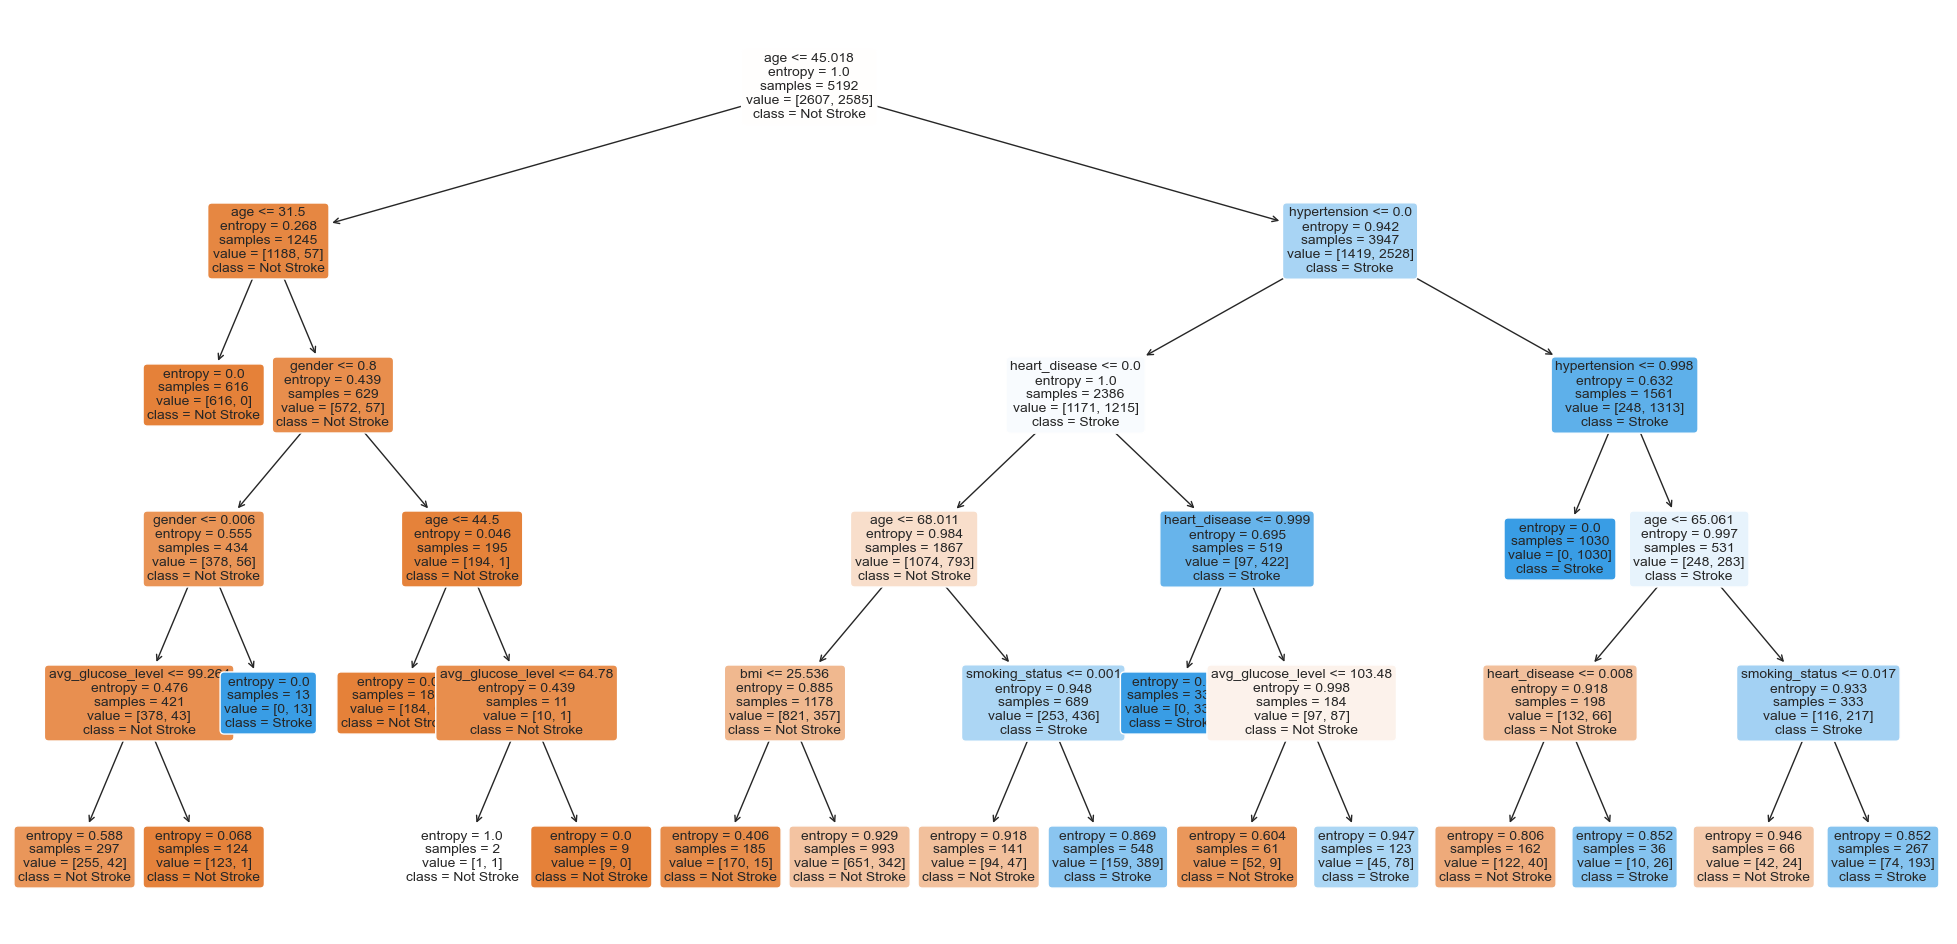

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 12))
plot_tree(strokeTree, filled=True, feature_names=['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status'], 
          class_names=['Not Stroke', 'Stroke'], rounded=True, fontsize=10)
plt.show()

---
### <div align="center">Algorithm Support Vector Machine</div>

#### Modeling

In [48]:
from sklearn import svm

In [49]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 0])

#### Evaluation

In [50]:
print('\nClassification Report for Support Vector Machine Algorithm:')
print('\n', classification_report(y_test, yhat))


Classification Report for Support Vector Machine Algorithm:

               precision    recall  f1-score   support

           0       0.76      0.72      0.74       638
           1       0.74      0.78      0.76       660

    accuracy                           0.75      1298
   macro avg       0.75      0.75      0.75      1298
weighted avg       0.75      0.75      0.75      1298



In [51]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))

SVM's Accuracy:  0.75115562403698


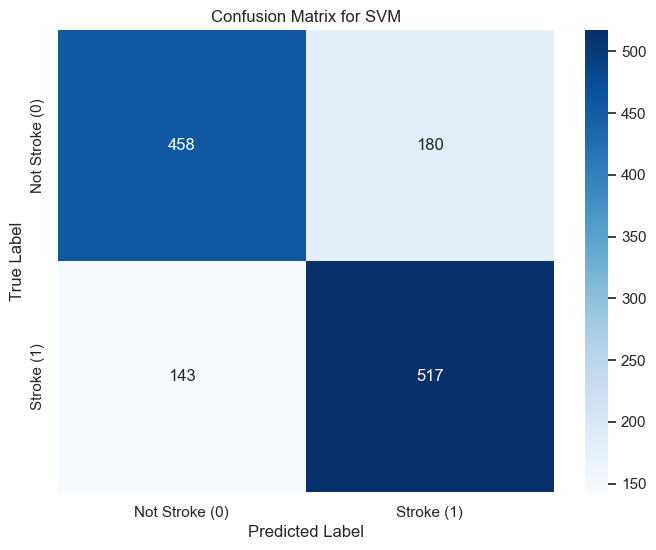

In [52]:
viz_cm = confusion_matrix(y_test, yhat)
labels = ['Not Stroke (0)', 'Stroke (1)']
          
plt.figure(figsize=(8, 6))
sns.heatmap(viz_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
print("Avg F1-score : %.4f" % f1_score(y_test, yhat, average="weighted"))
print("Jaccard_score : %.4f" % jaccard_score(y_test, yhat, average="micro"))

Avg F1-score : 0.7508
Jaccard_score : 0.6015


---
### <div align="center">Algorithm K-Nearest Neighbors Classification</div>

#### Modeling

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5) 

In [55]:
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

#### Evaluation

In [56]:
print('\nClassification Report for KNN:')
print('\n', classification_report(y_test, knn_pred))


Classification Report for KNN:

               precision    recall  f1-score   support

           0       0.95      0.78      0.86       638
           1       0.82      0.96      0.89       660

    accuracy                           0.87      1298
   macro avg       0.89      0.87      0.87      1298
weighted avg       0.89      0.87      0.87      1298



In [57]:
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, knn_pred))

KNN's Accuracy:  0.8736517719568567


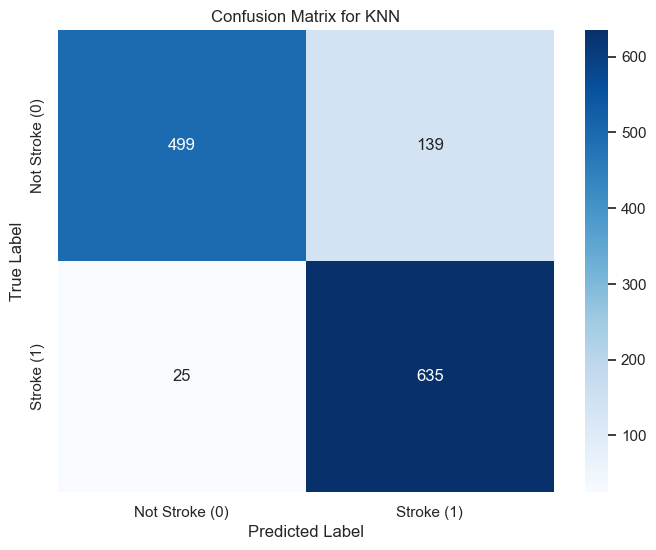

In [58]:
knn_cm = confusion_matrix(y_test, knn_pred)
labels = ['Not Stroke (0)', 'Stroke (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---
### <div align="center">Algorithm LightGBM</div>

#### Modelling

In [69]:
import lightgbm as lgb

In [70]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2585, number of negative: 2607
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5192, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497881 -> initscore=-0.008475
[LightGBM] [Info] Start training from score -0.008475


LGBMClassifier()

In [71]:
lgb_pred = lgb_model.predict(X_test)

#### Evaluation

In [72]:
print('\nClassification Report for Light GBM:')
print('\n', classification_report(y_test, lgb_pred))


Classification Report for Light GBM:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96       638
           1       0.98      0.94      0.96       660

    accuracy                           0.96      1298
   macro avg       0.96      0.96      0.96      1298
weighted avg       0.96      0.96      0.96      1298



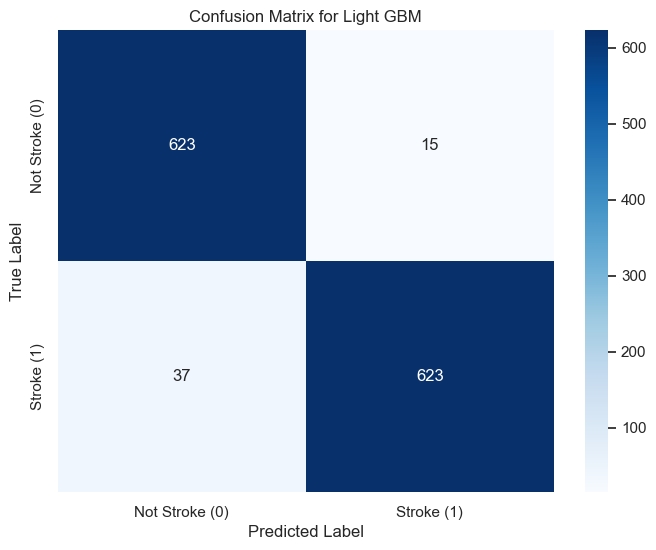

In [73]:
lgb_cm = confusion_matrix(y_test, lgb_pred)
labels = ['Not Stroke (0)', 'Stroke (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(lgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Light GBM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---
### <div align="center">Comparation dari Tiap Algorithm yang dipakai</div>

In [74]:
# Classification Report Decision Tree
DT_precision = [0.80, 0.89]
DT_recall = [0.90, 0.79]
DT_f1 = [0.85, 0.83]
DT_accuracy = 0.84  

# Classification Report SVM
SVM_precision = [0.76, 0.74]
SVM_recall = [0.72, 0.78]
SVM_f1 = [0.74, 0.76]
SVM_accuracy = 0.75  

# Classification Report KNN
KNN_precision = [0.95, 0.82]
KNN_recall = [0.78, 0.96]
KNN_f1 = [0.86, 0.89]
KNN_accuracy =  0.87

# Classification Report Light GBM
LGBM_precision = [0.94, 0.98]
LGBM_recall = [0.98, 0.94]
LGBM_f1 = [0.96, 0.96]
LGBM_accuracy = 0.96

# Labels
labels = ['Not Stroke (0)', 'Stroke (1)']

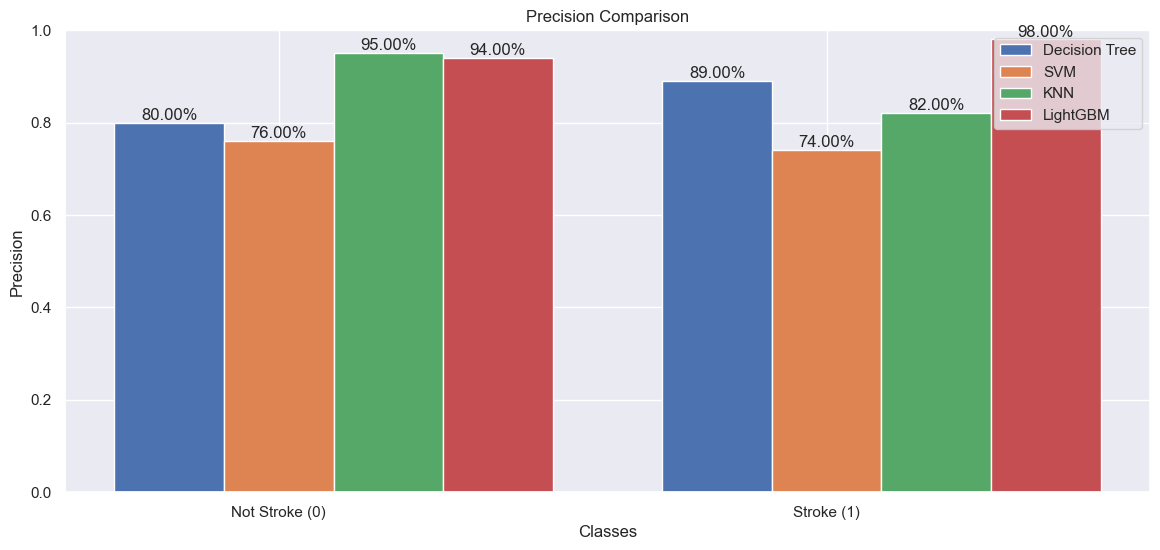

In [75]:
# Plotting precision
plt.figure(figsize=(14, 6))
bar_width = 0.2

bars_dt = plt.bar(np.arange(len(labels)), DT_precision, width=bar_width, label='Decision Tree', align='center')
bars_svm = plt.bar(np.arange(len(labels)) + bar_width, SVM_precision, width=bar_width, label='SVM', align='center')
bars_knn = plt.bar(np.arange(len(labels)) + 2*bar_width, KNN_precision, width=bar_width, label='KNN', align='center')
bars_lgbm = plt.bar(np.arange(len(labels)) + 3*bar_width, LGBM_precision, width=bar_width, label='LightGBM', align='center')

plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.xticks(np.arange(len(labels)) + bar_width, labels)

# Menambahkan persentase
for bars in [bars_dt, bars_svm, bars_knn, bars_lgbm]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.legend()
plt.ylim(0, 1.0)
plt.show()

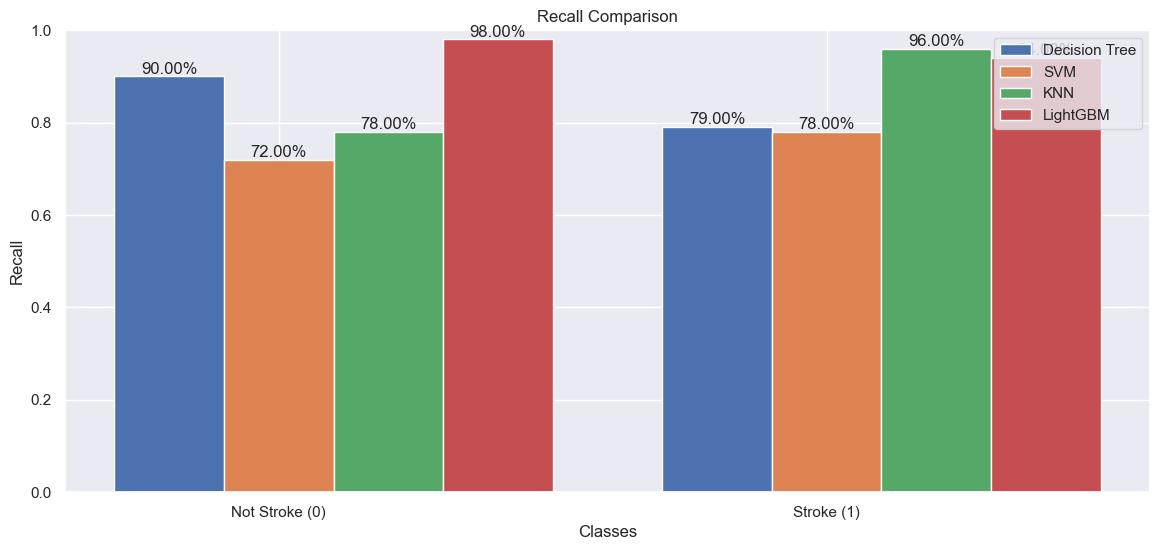

In [76]:
# Plotting recall
plt.figure(figsize=(14, 6))
bar_width = 0.2

bars_dt = plt.bar(np.arange(len(labels)), DT_recall, width=bar_width, label='Decision Tree', align='center')
bars_svm = plt.bar(np.arange(len(labels)) + bar_width, SVM_recall, width=bar_width, label='SVM', align='center')
bars_knn = plt.bar(np.arange(len(labels)) + 2*bar_width, KNN_recall, width=bar_width, label='KNN', align='center')
bars_lgbm = plt.bar(np.arange(len(labels)) + 3*bar_width, LGBM_recall, width=bar_width, label='LightGBM', align='center')

plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.xticks(np.arange(len(labels)) + bar_width, labels)

# Menambahkan persentase
for bars in [bars_dt, bars_svm, bars_knn, bars_lgbm]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.legend()
plt.ylim(0, 1.0)
plt.show()

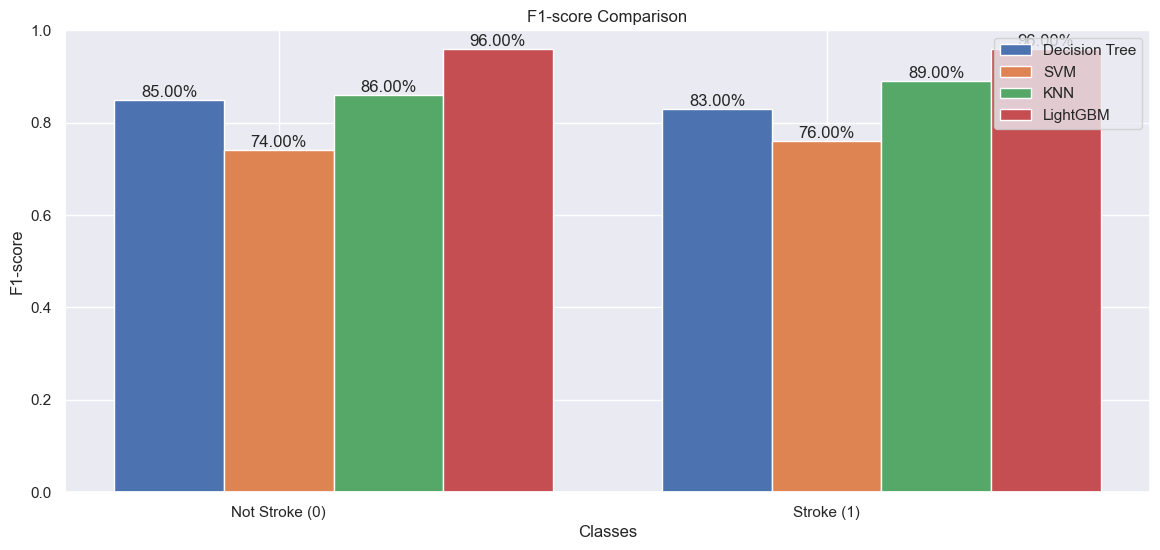

In [77]:
# Plotting F1-score
plt.figure(figsize=(14, 6))
bar_width = 0.2

bars_dt = plt.bar(np.arange(len(labels)), DT_f1, width=bar_width, label='Decision Tree', align='center')
bars_svm = plt.bar(np.arange(len(labels)) + bar_width, SVM_f1, width=bar_width, label='SVM', align='center')
bars_knn = plt.bar(np.arange(len(labels)) + 2*bar_width, KNN_f1, width=bar_width, label='KNN', align='center')
bars_lgbm = plt.bar(np.arange(len(labels)) + 3*bar_width, LGBM_f1, width=bar_width, label='LightGBM', align='center')

plt.xlabel('Classes')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.xticks(np.arange(len(labels)) + bar_width, labels)

# Menambahkan persentase
for bars in [bars_dt, bars_svm, bars_knn, bars_lgbm]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.legend()
plt.ylim(0, 1.0)
plt.show()

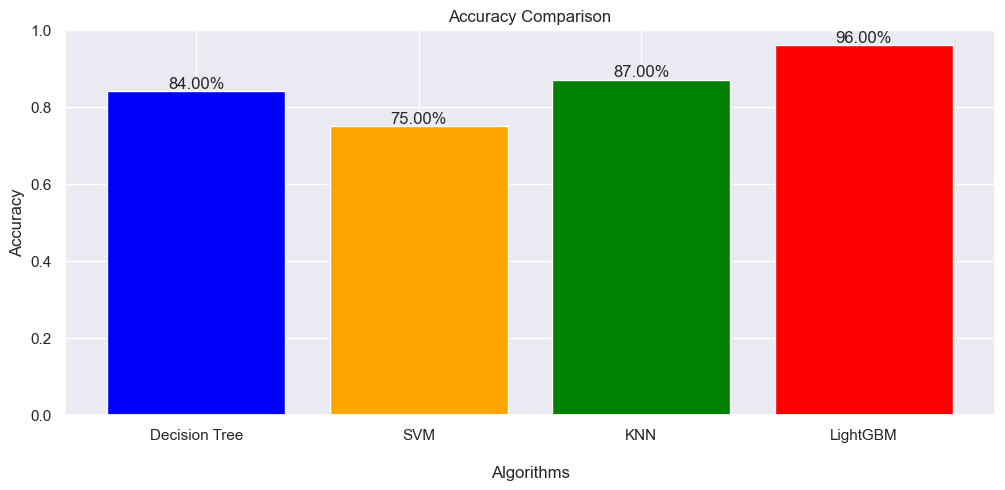

In [85]:
# Plotting Accuracy
plt.figure(figsize=(12, 5))
accuracy_values = [DT_accuracy, SVM_accuracy, KNN_accuracy, LGBM_accuracy]
bars = plt.bar(['Decision Tree', 'SVM', 'KNN', 'LightGBM'], accuracy_values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1.0)

# Menambahkan persentase
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.xlabel('\nAlgorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

---

#### Test Prediction

In [79]:
coba = [[1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.]]

cobaDT = strokeTree.predict(coba)
print("Dengan menggunakan model Algorithm Decision Tree")
for prediction in cobaDT:
    if prediction == 0:
        print("Diprediksi pasien tidak menderita Stroke")
    else:
        print("Diprediksi pasien menderita Stroke")

Dengan menggunakan model Algorithm Decision Tree
Diprediksi pasien menderita Stroke


In [80]:
coba = [[1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.]]

cobaSVM = clf.predict(coba)
print("Dengan menggunakan model Algorithm SVM")
for prediction in cobaSVM:
    if prediction == 0:
        print("Diprediksi pasien tidak menderita Stroke")
    else:
        print("Diprediksi pasien menderita Stroke")

Dengan menggunakan model Algorithm SVM
Diprediksi pasien menderita Stroke


In [81]:
coba = [[1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.]]

cobaKNN = knn_model.predict(coba)
print("Dengan menggunakan model Algorithm KNN")
for prediction in cobaKNN:
    if prediction == 0:
        print("Diprediksi pasien tidak menderita Stroke")
    else:
        print("Diprediksi pasien menderita Stroke")

Dengan menggunakan model Algorithm KNN
Diprediksi pasien menderita Stroke


#### Compare the prediction

In [87]:
compare = pd.DataFrame({'Stroke Actual': y_test, 'Predicted_DT': predTree, 
                        'Predicted_SVM': yhat, 'Predicted_KNN': knn_pred, 
                        'Predicted_LightGBM': lgb_pred})

for column in compare:
    compare[column] = compare[column].map({0: 'Not Stroke', 1: 'Stroke'})
    
compare

,Stroke Actual,Predicted_DT,Predicted_SVM,Predicted_KNN,Predicted_LightGBM
3885,Stroke,Stroke,Stroke,Stroke,Stroke
2217,Not Stroke,Not Stroke,Stroke,Not Stroke,Not Stroke
1902,Not Stroke,Not Stroke,Stroke,Not Stroke,Not Stroke
3210,Not Stroke,Stroke,Stroke,Stroke,Stroke
2021,Not Stroke,Not Stroke,Not Stroke,Not Stroke,Not Stroke
...,...,...,...,...,...
2318,Not Stroke,Stroke,Stroke,Not Stroke,Not Stroke
6119,Stroke,Stroke,Stroke,Stroke,Stroke
2592,Not Stroke,Not Stroke,Not Stroke,Stroke,Not Stroke
1151,Not Stroke,Not Stroke,Not Stroke,Not Stroke,Not Stroke
